In [46]:
import numpy as np
import torch
import pyro
from torch.distributions import constraints
from pyro import distributions as dist
import matplotlib.pylab as plt
import openml
import pandas as pd

In [ ]:
# infer whether a distribution is continuous or discrete

In [7]:
N = 1000

In [18]:
standard_normal = dist.Normal(0,1)
categorical = dist.Categorical(probs = torch.tensor([0.2, 0.05, 0.04, 0.06, 0.1, 0.4]))

In [19]:
cont_sample = standard_normal.sample((N,))
cat_sample = categorical.sample((N,))

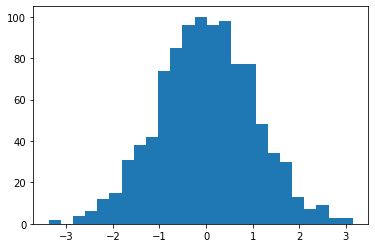

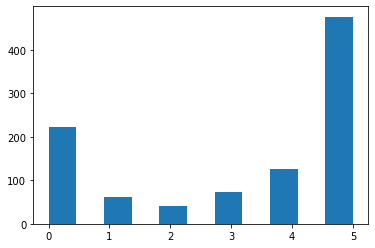

In [20]:
plt.hist(cont_sample, 'auto');
plt.figure()
plt.hist(cat_sample, 'auto');

In [25]:
def n_unique_obs(sample):
    return len(np.unique(sample))

In [26]:
def prop_unique_obs(sample):
    return n_unique_obs(sample)/len(sample)

In [27]:
prop_unique_obs(cont_sample)

1.0

In [28]:
prop_unique_obs(cat_sample)

0.006

In [31]:
creditg = openml.datasets.get_dataset(31)

In [32]:
creditg

OpenML Dataset
Name..........: credit-g
Version.......: 1
Format........: ARFF
Upload Date...: 2014-04-06 23:21:47
Licence.......: Public
Download URL..: https://www.openml.org/data/v1/download/31/credit-g.arff
OpenML URL....: https://www.openml.org/d/31
# of features.: 21
# of instances: 1000

In [33]:
creditg.features

{0: [0 - checking_status (nominal)],
 1: [1 - duration (numeric)],
 2: [2 - credit_history (nominal)],
 3: [3 - purpose (nominal)],
 4: [4 - credit_amount (numeric)],
 5: [5 - savings_status (nominal)],
 6: [6 - employment (nominal)],
 7: [7 - installment_commitment (numeric)],
 8: [8 - personal_status (nominal)],
 9: [9 - other_parties (nominal)],
 10: [10 - residence_since (numeric)],
 11: [11 - property_magnitude (nominal)],
 12: [12 - age (numeric)],
 13: [13 - other_payment_plans (nominal)],
 14: [14 - housing (nominal)],
 15: [15 - existing_credits (numeric)],
 16: [16 - job (nominal)],
 17: [17 - num_dependents (numeric)],
 18: [18 - own_telephone (nominal)],
 19: [19 - foreign_worker (nominal)],
 20: [20 - class (nominal)]}

In [34]:
data = creditg.get_data()

In [59]:
for feature in data[0]:
    print(prop_unique_obs(data[0][feature]))

0.004
0.033
0.005
0.01
0.921
0.005
0.005
0.004
0.004
0.003
0.004
0.004
0.053
0.003
0.003
0.004
0.004
0.002
0.002
0.002
0.002


In [61]:
data[0]['existing_credits']

0      2.0
1      1.0
2      1.0
3      1.0
4      2.0
      ... 
995    1.0
996    1.0
997    1.0
998    1.0
999    1.0
Name: existing_credits, Length: 1000, dtype: float64

In [45]:
data[0]['checking_status']

0               <0
1         0<=X<200
2      no checking
3               <0
4               <0
          ...     
995    no checking
996             <0
997    no checking
998             <0
999       0<=X<200
Name: checking_status, Length: 1000, dtype: category
Categories (4, object): [<0 < 0<=X<200 < >=200 < no checking]

In [48]:
data[0]['checking_status'].cat.codes

0      0
1      1
2      3
3      0
4      0
      ..
995    3
996    0
997    3
998    0
999    1
Length: 1000, dtype: int8

In [52]:
data[0]['duration']

0       6.0
1      48.0
2      12.0
3      42.0
4      24.0
       ... 
995    12.0
996    30.0
997    12.0
998    45.0
999    45.0
Name: duration, Length: 1000, dtype: float64

In [51]:
prop_unique_obs(data[0]['duration'])

0.033

(array([ 82.,  12.,  86., 183.,  68., 115.,   8.,  32., 184.,  14.,   3.,
         40.,   3.,  83.,   5.,   1.,  11.,   5.,  49.,   0.,   0.,   2.,
          0.,  13.,   0.,   0.,   0.,   0.,   1.]),
 array([ 4.        ,  6.34482759,  8.68965517, 11.03448276, 13.37931034,
        15.72413793, 18.06896552, 20.4137931 , 22.75862069, 25.10344828,
        27.44827586, 29.79310345, 32.13793103, 34.48275862, 36.82758621,
        39.17241379, 41.51724138, 43.86206897, 46.20689655, 48.55172414,
        50.89655172, 53.24137931, 55.5862069 , 57.93103448, 60.27586207,
        62.62068966, 64.96551724, 67.31034483, 69.65517241, 72.        ]),
 <a list of 29 Patch objects>)

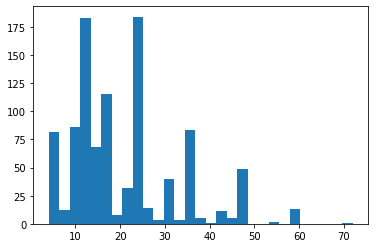

In [50]:
plt.hist(data[0]['duration'],'auto')